In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
file_path = "E:\\Mini project\\Dataset\\hmnist_28_28_RGB.csv"
data = pd.read_csv(file_path)

In [3]:
X = data.drop('label', axis=1)
y = data['label']

In [27]:
X.iloc[:, : 10].head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009
0,192,153,193,195,155,192,197,154,185,202
1,25,14,30,68,48,75,123,93,126,158
2,192,138,153,200,145,163,201,142,160,206
3,38,19,30,95,59,72,143,103,119,171
4,158,113,139,194,144,174,215,162,191,225


In [4]:
X_reshaped = X.values.reshape(-1, 28, 28, 3)


In [30]:
X_reshaped[0]

array([[[192, 153, 193],
        [195, 155, 192],
        [197, 154, 185],
        ...,
        [193, 144, 153],
        [197, 154, 163],
        [194, 152, 160]],

       [[197, 162, 202],
        [201, 160, 197],
        [202, 160, 193],
        ...,
        [194, 147, 149],
        [198, 158, 166],
        [192, 153, 167]],

       [[197, 155, 193],
        [198, 154, 185],
        [202, 156, 191],
        ...,
        [194, 149, 152],
        [199, 161, 177],
        [194, 156, 175]],

       ...,

       [[194, 157, 191],
        [206, 173, 206],
        [206, 165, 192],
        ...,
        [191, 155, 183],
        [193, 159, 187],
        [193, 163, 197]],

       [[187, 154, 185],
        [203, 171, 199],
        [202, 161, 183],
        ...,
        [178, 131, 148],
        [187, 152, 174],
        [190, 159, 189]],

       [[171, 136, 164],
        [191, 153, 179],
        [196, 155, 176],
        ...,
        [173, 124, 138],
        [183, 147, 166],
        [185, 154, 177]]

In [5]:
X_normalized = X_reshaped / 255.0

In [31]:
X_normalized[0]

array([[[0.75294118, 0.6       , 0.75686275],
        [0.76470588, 0.60784314, 0.75294118],
        [0.77254902, 0.60392157, 0.7254902 ],
        ...,
        [0.75686275, 0.56470588, 0.6       ],
        [0.77254902, 0.60392157, 0.63921569],
        [0.76078431, 0.59607843, 0.62745098]],

       [[0.77254902, 0.63529412, 0.79215686],
        [0.78823529, 0.62745098, 0.77254902],
        [0.79215686, 0.62745098, 0.75686275],
        ...,
        [0.76078431, 0.57647059, 0.58431373],
        [0.77647059, 0.61960784, 0.65098039],
        [0.75294118, 0.6       , 0.65490196]],

       [[0.77254902, 0.60784314, 0.75686275],
        [0.77647059, 0.60392157, 0.7254902 ],
        [0.79215686, 0.61176471, 0.74901961],
        ...,
        [0.76078431, 0.58431373, 0.59607843],
        [0.78039216, 0.63137255, 0.69411765],
        [0.76078431, 0.61176471, 0.68627451]],

       ...,

       [[0.76078431, 0.61568627, 0.74901961],
        [0.80784314, 0.67843137, 0.80784314],
        [0.80784314, 0

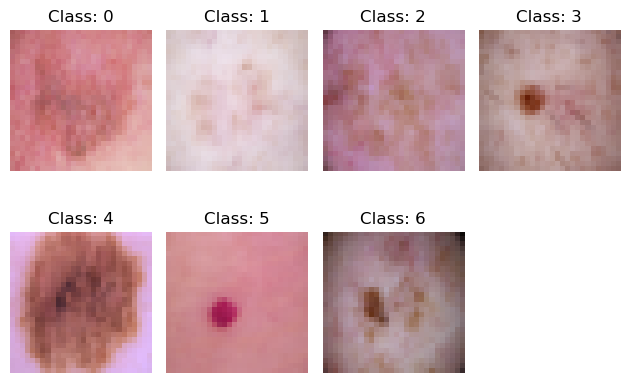

In [6]:
num_classes = len(np.unique(y))
class_indices = {}
for class_label in np.unique(y):
    class_indices[class_label] = np.where(y == class_label)[0]

for i, class_label in enumerate(np.unique(y)):
    idx = np.random.choice(class_indices[class_label])
    plt.subplot(2, (num_classes + 1) // 2, i + 1)
    plt.imshow(X_reshaped[idx].astype('uint8'))
    plt.title(f"Class: {class_label}")
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('sample_images_per_class.png')
plt.show()

In [7]:
y = y.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)


In [13]:
history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/50
201/201 [==============================] - 6s 9ms/step - loss: 1.5069 - accuracy: 0.5363 - val_loss: 1.4380 - val_accuracy: 0.3712 - lr: 0.0010
Epoch 2/50
201/201 [==============================] - 1s 7ms/step - loss: 0.9567 - accuracy: 0.6769 - val_loss: 1.0659 - val_accuracy: 0.6638 - lr: 0.0010
Epoch 3/50
201/201 [==============================] - 1s 6ms/step - loss: 0.8532 - accuracy: 0.7018 - val_loss: 0.9490 - val_accuracy: 0.6407 - lr: 0.0010
Epoch 4/50
201/201 [==============================] - 1s 6ms/step - loss: 0.7794 - accuracy: 0.7154 - val_loss: 0.7862 - val_accuracy: 0.7056 - lr: 0.0010
Epoch 5/50
201/201 [==============================] - 1s 6ms/step - loss: 0.7607 - accuracy: 0.7243 - val_loss: 0.7326 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 6/50
201/201 [==============================] - 1s 6ms/step - loss: 0.7162 - accuracy: 0.7430 - val_loss: 0.9001 - val_accuracy: 0.6388 - lr: 0.0010
Epoch 7/50
201/201 [==============================] - 1s 6ms/step - lo

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f'Test accuracy: {test_acc:.4f}')

63/63 [==============================] - 0s 3ms/step - loss: 0.5985 - accuracy: 0.7783
Test accuracy: 0.7783


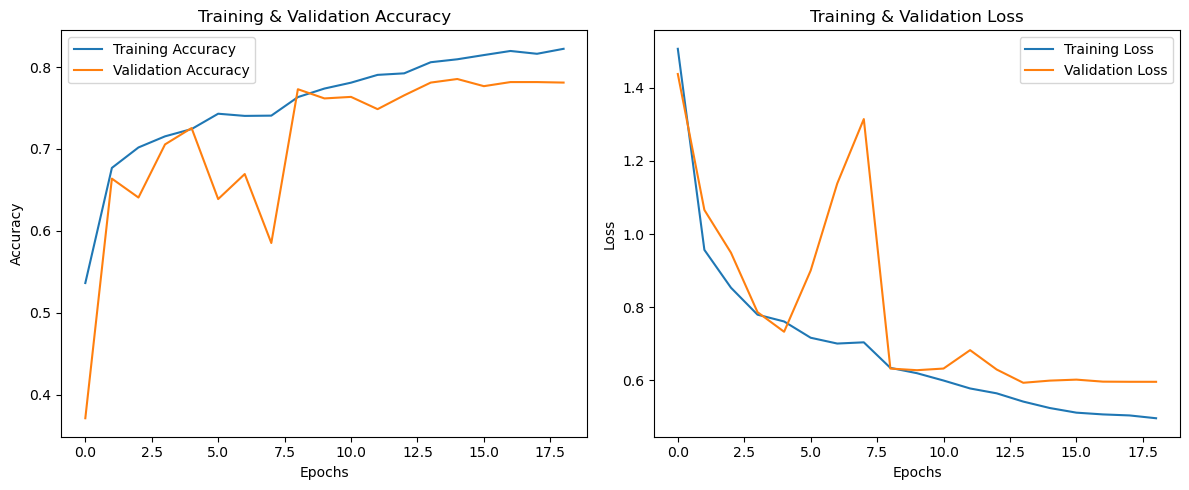

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training & Validation Loss")

plt.tight_layout()
plt.savefig('training_report.png')
plt.show()

In [17]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test

63/63 [==============================] - 0s 1ms/step


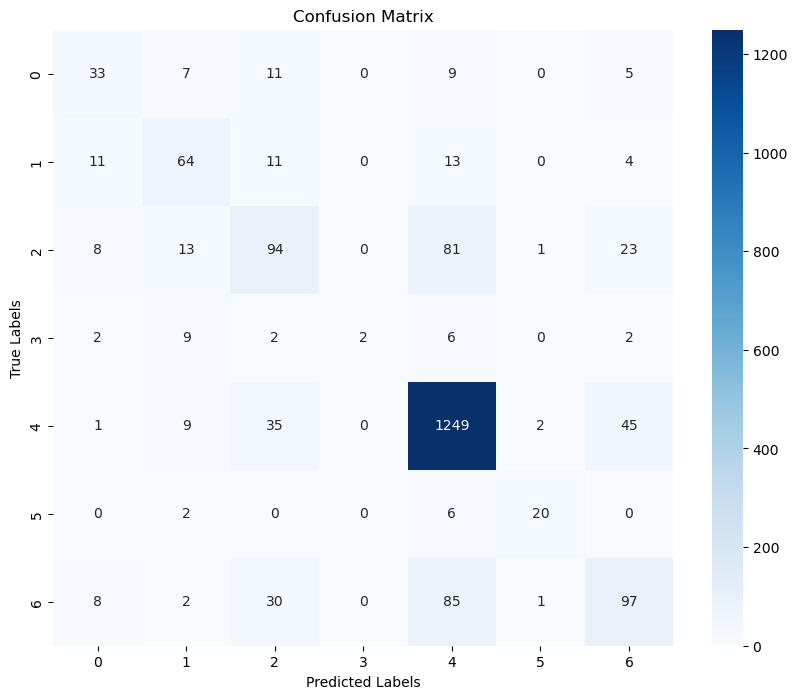

In [18]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

In [19]:
class_report = classification_report(y_true, y_pred, target_names=[f'Class {i}' for i in np.unique(y_true)])
print(class_report)

              precision    recall  f1-score   support

     Class 0       0.52      0.51      0.52        65
     Class 1       0.60      0.62      0.61       103
     Class 2       0.51      0.43      0.47       220
     Class 3       1.00      0.09      0.16        23
     Class 4       0.86      0.93      0.90      1341
     Class 5       0.83      0.71      0.77        28
     Class 6       0.55      0.43      0.49       223

    accuracy                           0.78      2003
   macro avg       0.70      0.53      0.56      2003
weighted avg       0.77      0.78      0.77      2003



In [20]:
metadata = pd.read_csv("E:\Mini project\Dataset\HAM10000_metadata.csv")
lesion_counts = metadata['dx'].value_counts()

C:\Users\Ashwath\AppData\Local\Temp\ipykernel_20188\486353736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lesion_counts.index, y=lesion_counts.values, palette="viridis")


Text(0.5, 1.0, 'Distribution of Skin Lesion Types in HAM10000 Dataset')

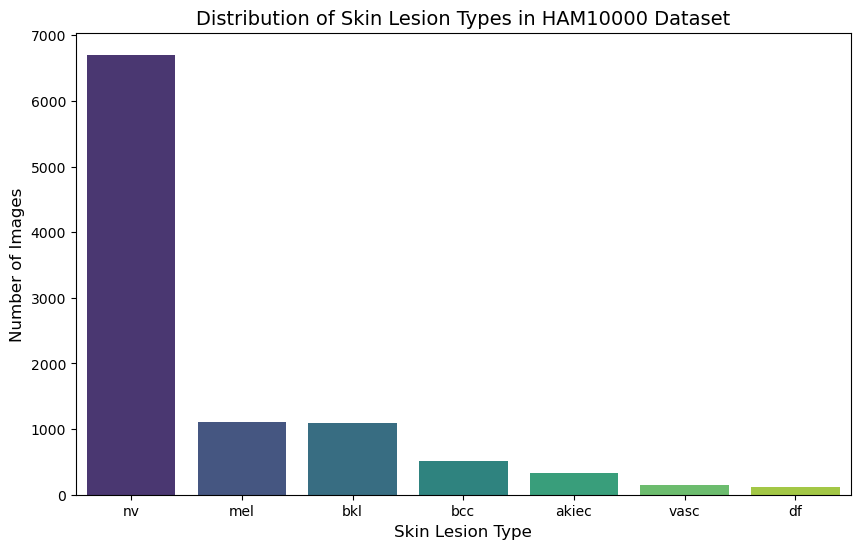

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=lesion_counts.index, y=lesion_counts.values, palette="viridis")
plt.xlabel("Skin Lesion Type", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Distribution of Skin Lesion Types in HAM10000 Dataset", fontsize=14)